In [3]:
pip install scikit-learn

  Using cached scikit_learn-1.5.0-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached scipy-1.13.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.0-cp312-cp312-win_amd64.whl (10.9 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.13.1-cp312-cp312-win_amd64.whl (45.9 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   MYCT    209 non-null    int64
 1   MMIN    209 non-null    int64
 2   MMAX    209 non-null    int64
 3   CACH    209 non-null    int64
 4   CHMIN   209 non-null    int64
 5   CHMAX   209 non-null    int64
 6   PRP     209 non-null    int64
dtypes: int64(7)
memory usage: 11.6 KB
None
              MYCT          MMIN          MMAX        CACH       CHMIN  \
count   209.000000    209.000000    209.000000  209.000000  209.000000   
mean    203.822967   2867.980861  11796.153110   25.205742    4.698565   
std     260.262926   3878.742758  11726.564377   40.628722    6.816274   
min      17.000000     64.000000     64.000000    0.000000    0.000000   
25%      50.000000    768.000000   4000.000000    0.000000    1.000000   
50%     110.000000   2000.000000   8000.000000    8.000000    2.000000   
75%     225.000000 

C:\Users\sandy\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\sandy\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


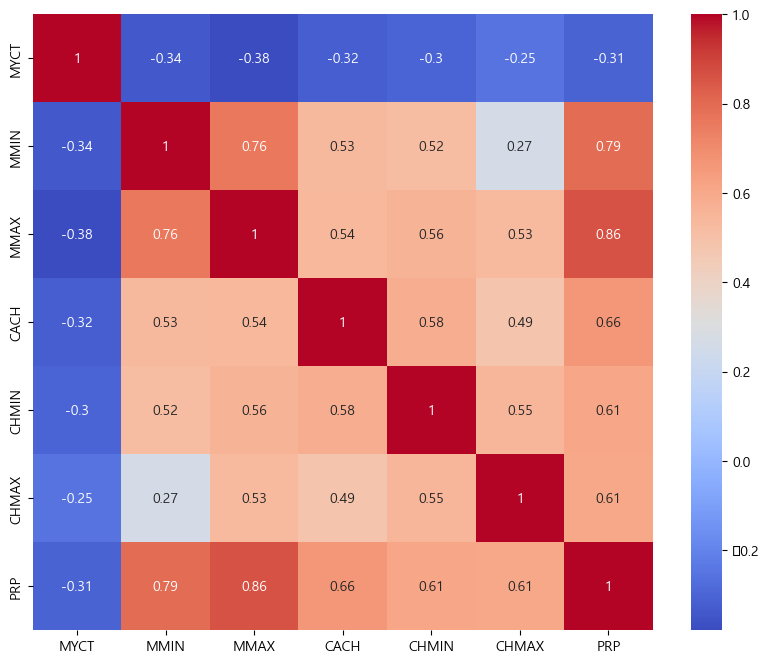

Cross-validation scores: [0.63828223 0.44329768 0.45334519 0.85890627 0.86028105]
Average cross-validation score: 0.6508224821731221
Train MSE: 3117.658905430178
Test MSE: 5633.068155793254
Train MAE: 35.12200634651686
Test MAE: 48.068801347004765
Train R^2: 0.8378284557995717
Test R^2: 0.8893455830696775
Best parameters: {'alpha': 100.0}
Best Train R^2: 0.797032245326731
Best Test R^2: 0.8126195590338494


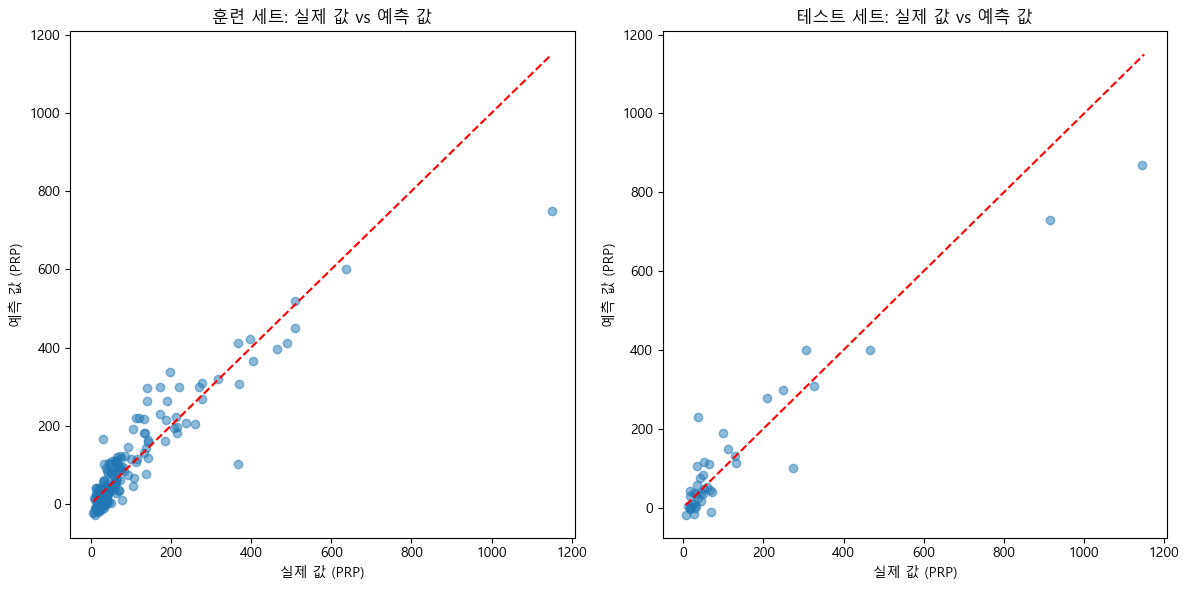

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# 데이터 로드
df = pd.read_csv('machine_data_update.csv')
columns = ["Vendor name", "Model name", "MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX", "PRP", "ERP"]
data = pd.read_csv(url, names=columns)

# 필요없는 열 제거
data = data.drop(columns=["Vendor name", "Model name", "ERP"])

# 데이터 탐색
print(data.info())
print(data.describe())
print(data.corr())

# 상관 관계 히트맵
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.show()

# 특성과 타겟 변수 분리
X = data.drop(columns=["PRP"])
y = data["PRP"]

# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 다중 선형 회귀 모델
model = LinearRegression()

# 교차 검증
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Average cross-validation score: {cv_scores.mean()}")

# 모델 학습
model.fit(X_train_scaled, y_train)

# 예측
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# 평가
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Train MAE: {train_mae}")
print(f"Test MAE: {test_mae}")
print(f"Train R^2: {train_r2}")
print(f"Test R^2: {test_r2}")

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Ridge Regression 모델
ridge = Ridge()

# 하이퍼파라미터 튜닝
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}
grid_search = GridSearchCV(ridge, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# 최적 모델
best_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

# 최적 모델 평가
y_train_pred_best = best_model.predict(X_train_scaled)
y_test_pred_best = best_model.predict(X_test_scaled)

train_r2_best = r2_score(y_train, y_train_pred_best)
test_r2_best = r2_score(y_test, y_test_pred_best)

print(f"Best Train R^2: {train_r2_best}")
print(f"Best Test R^2: {test_r2_best}")


# 실제 값 vs 예측 값 시각화
def plot_predictions(y_true, y_pred, title):
    """산점도를 사용하여 실제 값과 예측 값을 비교합니다."""
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # 기준선
    plt.xlabel('실제 값 (PRP)')
    plt.ylabel('예측 값 (PRP)')
    plt.title(title)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_predictions(y_train, y_train_pred, '훈련 세트: 실제 값 vs 예측 값')
plt.subplot(1, 2, 2)
plot_predictions(y_test, y_test_pred, '테스트 세트: 실제 값 vs 예측 값')

plt.tight_layout()
plt.show()


평가 지표:
|    | Metric   |   Training |   Testing |
|----|----------|------------|-----------|
|  0 | MSE      |  1529.0205 | 2370.0964 |
|  1 | MAE      |    23.2323 |   31.4062 |
|  2 | R^2      |     0.9205 |    0.9534 |

교차 검증:
Mean R^2: 0.8334
Standard Deviation of R^2: 0.0726


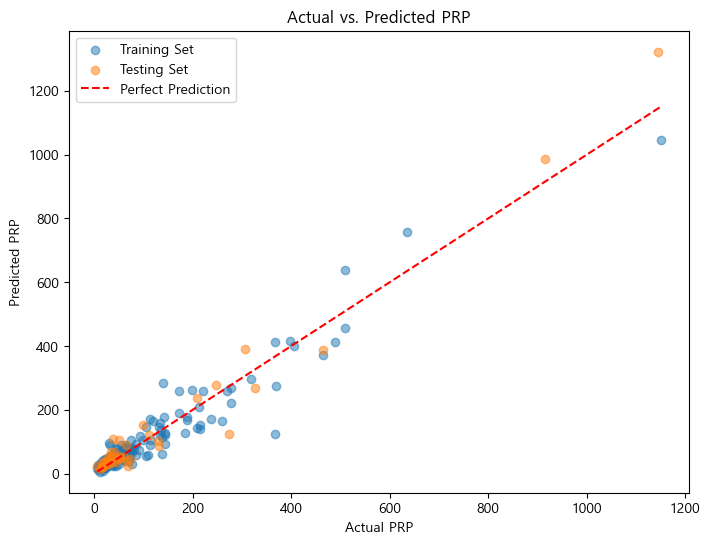

In [14]:
import matplotlib.pyplot as plt

# 평가 지표 DataFrame 출력
print("\n평가 지표:")
print(tabulate(results_df, headers='keys', tablefmt='github', floatfmt=".4f"))

# 교차 검증 평균 및 표준편차 출력
print("\n교차 검증:")
print(f"Mean R^2: {cv_scores.mean():.4f}")
print(f"Standard Deviation of R^2: {cv_scores.std():.4f}")

# 훈련 세트와 테스트 세트 데이터 병합
plt.figure(figsize=(8, 6))  # 그림 크기 설정
plt.scatter(y_train, y_train_pred, alpha=0.5, label='Training Set')  # 훈련 세트 산점도
plt.scatter(y_test, y_test_pred, alpha=0.5, label='Testing Set')  # 테스트 세트 산점도
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfect Prediction')  # 기준선
plt.xlabel('Actual PRP')  # x축 레이블
plt.ylabel('Predicted PRP')  # y축 레이블
plt.title('Actual vs. Predicted PRP')  # 제목
plt.legend()  # 범례 표시
plt.show()  # 그래프 출력
